# Analisis Exploratorio (EDA) Ejercicio

Raul Jimenez 19017

Oscar Saravia 19322

Donaldo Garcia 19683

In [1]:
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns
import random

## 1. (3 puntos) Haga una exploración rápida de sus datos, para eso haga un resumen de su conjunto de datos. 

In [7]:
movies = pd.read_csv('./movies.csv', encoding ='latin1')
movies.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


In [8]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10000.0,2.498768e+05,2.573801e+05,5.000,12286.50000,152558.0000,4.520218e+05,9.222600e+05
budget,10000.0,1.855163e+07,3.662669e+07,0.000,0.00000,500000.0000,2.000000e+07,3.800000e+08
revenue,10000.0,5.673793e+07,1.495854e+08,0.000,0.00000,163124.5000,4.479661e+07,2.847246e+09
runtime,10000.0,1.002681e+02,2.777783e+01,0.000,90.00000,100.0000,1.130000e+02,7.500000e+02
popularity,10000.0,5.139391e+01,2.167296e+02,4.258,14.57775,21.9055,4.065400e+01,1.147465e+04
voteAvg,10000.0,6.483490e+00,9.842740e-01,1.300,5.90000,6.5000,7.200000e+00,1.000000e+01
voteCount,10000.0,1.342382e+03,2.564197e+03,1.000,120.00000,415.0000,1.316000e+03,3.078800e+04
genresAmount,10000.0,2.596500e+00,1.154565e+00,0.000,2.00000,3.0000,3.000000e+00,1.600000e+01
productionCoAmount,10000.0,3.171400e+00,2.539738e+00,0.000,2.00000,3.0000,4.000000e+00,8.900000e+01
productionCountriesAmount,10000.0,1.751000e+00,3.012093e+00,0.000,1.00000,1.0000,2.000000e+00,1.550000e+02


## 2. (5 puntos) Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta) 

- id: id de la película **cualitativo, ordinal**
- popularity: Índice de popularidad de la película calculado semanalmente **cuantitativo, continuo** 
- budget: El presupuesto para la película **cuantitativo, continua** 
- revenue: El ingreso de la película **cuantitativo, continua**
- original_title: El título original de la película, en su idioma original **cualitativa, nominal** 
- originalLanguage: Idioma original en que se encuentra la película **cualititva, nominal**
- title: El título de la película traducido al inglés **cualitativa, nominal**
- homePage: La página de inicio de la película **cualitativa, nomial**
- video: Si tiene videos promocionales o no **cualitativa, nominal**
- director: Director de la película **cualitativo, nominal**
- runtime: La duración de la película **cuantitativo, continuo**
- genres: El género de la película **cualitativa, nominal**
- genresAmount: Cantidad de géneros que representan la película **cuantitativo, discreto**
- productionCompany: Las compañías productoras de la película **cualitativa, nominal**
- productionCoAmount: Cantidad de compañías productoras que participaron en la película **cuantitativo, discreto**  
- productionCompanyCountry: Países de las compañías productoras de la película **cualitativa, nominal**
- productionCountry: Países en los que se llevó a cabo la producción de la película **cualitativo, nominal**
- productionCountriesAmount: Cantidad de países en los que se rodó la película **cuantitativa, discreta**
- releaseDate: Fecha de lanzamiento de la película **cuantitativo, discreto**
- voteCount: El número de votos en la plataforma para la película **cuantitativo, discreto**
- voteAvg: El promedio de los votos en la plataforma para la película **cuantitativo, continuo**
- actors: Actores que participan en la película (Elenco) **cualitativo, nominal**
- actorsPopularity: Índice de popularidad del elenco de la película **cuantiativo, continuo**
- actorsCharacter: Personaje que interpreta cada actor en la película **cualitativo, nominal** 
- actorsAmount: Cantidad de personas que actúan en la película **cuantitativo, discreto**
- castWomenAmount: Cantidad de actrices en el elenco de la película **cuantitativo, discreto**
- castMenAmount: Cantidad de actores en el elenco de la película. **cuantitativo, discreto**

## 3.(6 puntos) Investigue si las variables cuantitativas siguen una distribución normal y haga una tabla de frecuencias de las variables cualitativas. Explique todos los resultados. 

### popularity 
Se puede determinar que la variable de popularity **NO** sigue una distribucion normal debido a que el histograma no sigue la forma de campana, en el boxplot se puede observar como es que la mayoria de los datos no entran en la caja al igual que en el diagrama QQ se puede observar que los datos son muy distintos entre si.

In [10]:
movies.popularity

0        20.880
1         9.596
2       100.003
3       134.435
4        58.751
         ...   
9995     16.662
9996    491.706
9997    565.658
9998      9.664
9999     83.747
Name: popularity, Length: 10000, dtype: float64

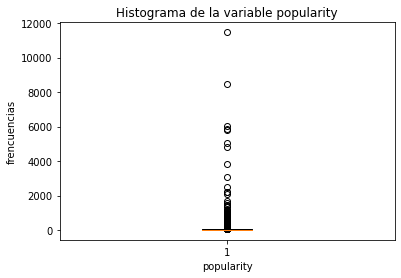

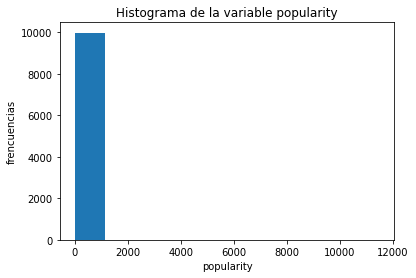

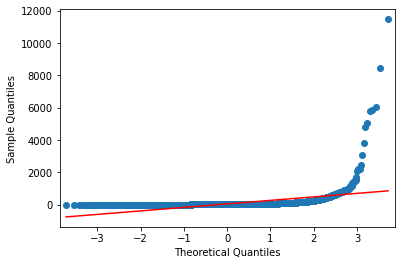

In [30]:
plt.boxplot(x = movies.popularity.dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

plt.hist(x = movies.popularity.dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.popularity.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

#### popularity sin datos atipicos (menores < 1000)

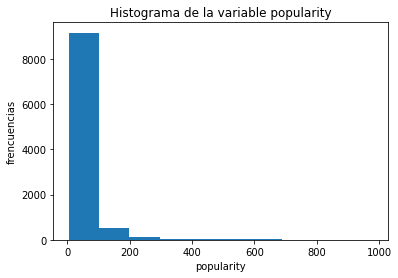

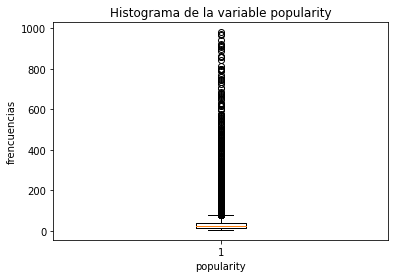

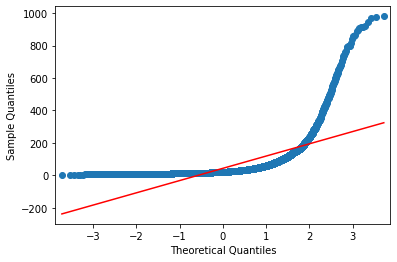

In [29]:
plt.hist(x = movies.popularity[movies.popularity < 1000].dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

plt.boxplot(x = movies.popularity[movies.popularity < 1000].dropna())
plt.title('Histograma de la variable popularity')
plt.xlabel('popularity')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.popularity[movies.popularity < 1000].dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### budget

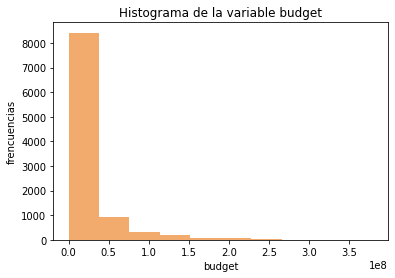

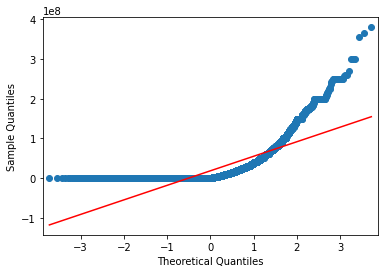

In [12]:
plt.hist(x = movies.budget.dropna(), color = '#F2AB6D', rwidth=1)
plt.title('Histograma de la variable budget')
plt.xlabel('budget')
plt.ylabel('frencuencias')
plt.show()

distribucion_generada = movies.budget.dropna()
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()

### revenue

### runtime

### genresAmount

### productionCoAmount

### releaseDate

### voteCount

### voteCount

## 4. Responda las siguientes preguntas: 